In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("apple_products.csv")

In [4]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [5]:
#checking null values

In [6]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [7]:
#no null values found 

In [9]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


# Q1. top 10 hightest rated iphones on flipkart in india

In [19]:
highest_rating = df.sort_values(by = ['Star Rating'] , ascending = False)
highest_rating = highest_rating.head(10)

In [21]:
print(highest_rating['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


# Q.2 How many ratings do the highest-rated iphones on flipkar have?

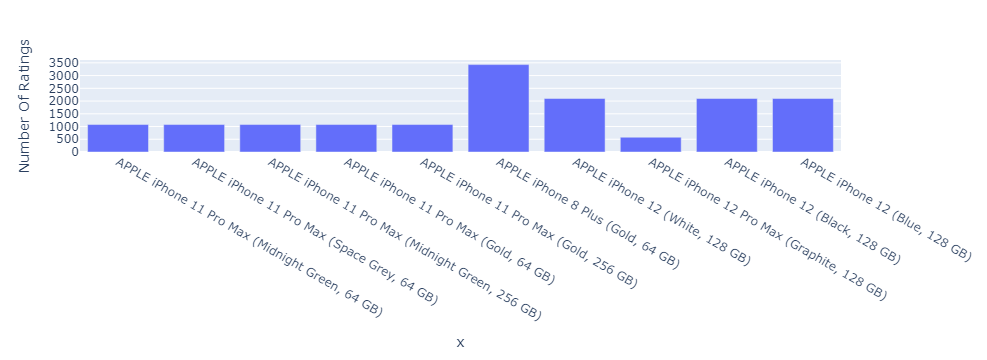

In [27]:
apple = highest_rating['Product Name'].value_counts()
label = apple.index
counts = highest_rating["Number Of Ratings"]
figure = px.bar(highest_rating , x=label , y=counts)

# Set the interval for y-axis ticks to 500

figure.update_layout(
    yaxis=dict(
        dtick=500))
figure.show()

#  Q3. which iphone has the highest numbers of review on flipkart??

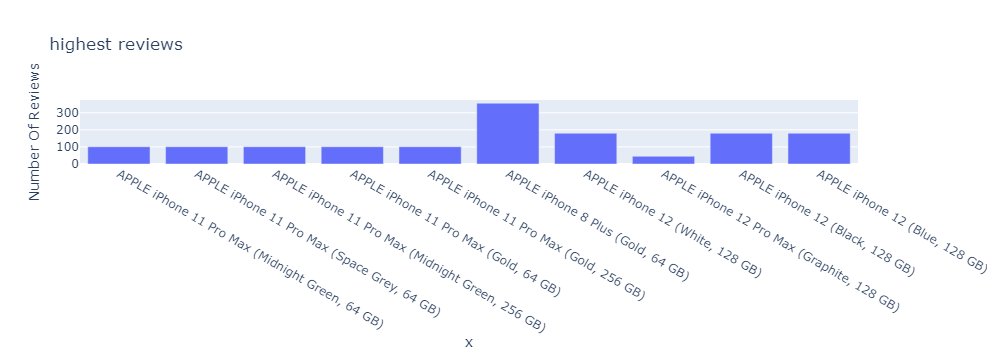

In [28]:
apple = highest_rating['Product Name'].value_counts()
label = apple.index
counts = highest_rating["Number Of Reviews"]
figure = px.bar(highest_rating , x=label , y=counts , title = "highest reviews")
figure.show()

# Q4. what is the relationship between the sale price of iphone and number of ratings on flipkart

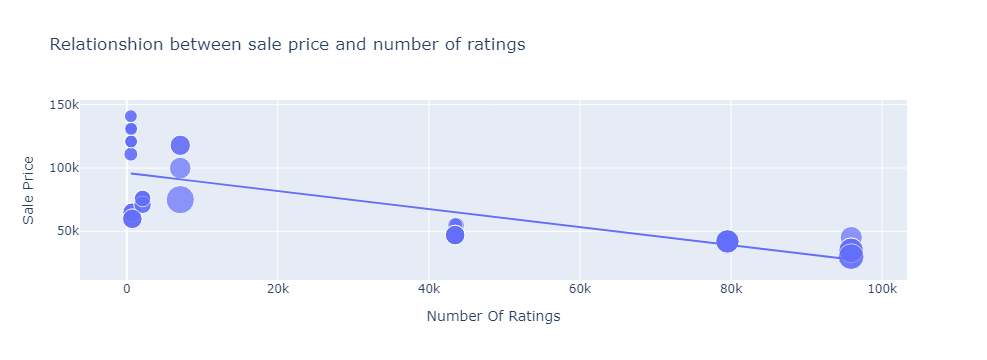

In [29]:
figure = px.scatter(data_frame = df , x = "Number Of Ratings" ,
                    y = "Sale Price" , size = "Discount Percentage" , trendline = "ols" ,
                    title = "Relationshion between sale price and number of ratings")

figure.show()

# Q5. What is the relationship between discount percentage and numbers of rating on flipkart?

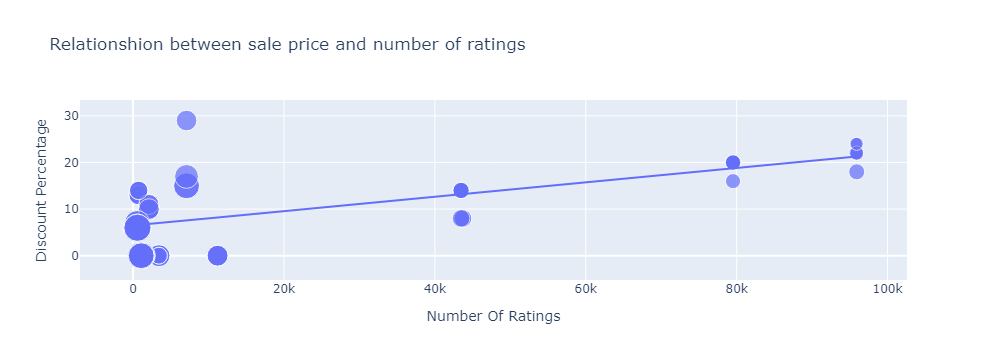

In [30]:
figure = px.scatter(data_frame = df , x = "Number Of Ratings" ,
                    y = "Discount Percentage" , size = "Sale Price" , trendline = "ols" ,
                    title = "Relationshion between sale price and number of ratings")

figure.show()

# Q6. figure out the least expensive and the most expensive iphone in indian market along with their all specifications ??

In [38]:
most_expensive = df.loc[df['Sale Price'].idxmax()]
least_expensive = df.loc[df['Sale Price'].idxmin()]

print("most expensive product:")
print(most_expensive)

print("least expensive product:")
print(least_expensive)





most expensive product:
Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
Name: 24, dtype: object
least expensive product:
Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/app